<h1 style="font-size:3rem;color:black;"> Manipulating Tabular data </h1>

<h2> Hypothesis </h2>

In [19]:
""" Null Hypothesis: Trees do not have a noticable positive effect on the air quality in NYC neighborhood
Alt Hypthothesis: Trees have a positive correlation on NYC neighborhood's air quality
"""

" Null Hypothesis: Trees do not have a noticable positive effect on the air quality in NYC neighborhood\nAlt Hypthothesis: Trees have a positive correlation on NYC neighborhood's air quality\n"

<h2> File Paths </h2>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
plt.style.use('ggplot')
# pd.set_option('max_columns' , 200)

In [21]:
"""Sources"""
file_path = '/Users/careb/Downloads/Classes/CSE 400/FinalProjectCSE400/Air_Quality_20240531.csv'
air = pd.read_csv(file_path)
#print(air.isna().any())
mis_val1 = pd.DataFrame(air)
mis_val1


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,1/1/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,1/1/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/1/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/1/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,6/1/2022,6.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,1/1/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,1/1/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,1/1/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,1/1/2010,65.8,NaN


In [22]:
file_path2 = '/Users/careb/Downloads/Classes/CSE 400/FinalProjectCSE400/2015StreetTreesCensus_TREES.csv'
trees15 = pd.read_csv(file_path2)
#print(trees15.isna().any())
mis_val2 = pd.DataFrame(trees15)
mis_val2.head(64)

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,"180,683","348,711",POINT (-73.84421521958048 40.723091773924274),3,0,OnCurb,Alive,Fair,Acer rubrum,...,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,"1,027,431.14821","202,756.768749"
1,09/03/2015,"200,540","315,986",POINT (-73.81867945834878 40.79411066708779),21,0,OnCurb,Alive,Fair,Quercus palustris,...,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,"1,034,455.70109","228,644.837379"
2,09/05/2015,"204,026","218,365",POINT (-73.93660770459083 40.717580740099116),3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,"1,001,822.83131","200,716.891267"
3,09/05/2015,"204,337","217,969",POINT (-73.93445615919741 40.713537494833226),10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,"1,002,420.35833","199,244.253136"
4,08/30/2015,"189,565","223,043",POINT (-73.97597938483258 40.66677775537875),21,0,OnCurb,Alive,Good,Tilia americana,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,"990,913.775046","182,202.425999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,09/08/2015,"208,974","414,958",POINT (-74.1065349443613 40.5610324289115),10,0,OnCurb,Alive,Good,Acer rubrum,...,64,24,SI25,Oakwood-Oakwood Beach,5012806,New York,40.561032,-74.106535,"954,648.334454","143,693.722505"
60,09/02/2015,"198,146","411,699",POINT (-74.19255286874332 40.539369387860575),6,0,OnCurb,Alive,Good,Acer rubrum,...,62,24,SI48,Arden Heights,5017009,New York,40.539369,-74.192553,"930,730.183472","135,842.179153"
61,09/01/2015,"194,505","341,521",POINT (-73.88725059080657 40.75902778398188),2,0,OnCurb,Dead,NaN,NaN,...,34,13,QN28,Jackson Heights,4030903,New York,40.759028,-73.887251,"1,015,485.56022","215,831.103492"
62,09/02/2015,"198,121","104,405",POINT (-73.98253014634868 40.745033994065416),8,0,OnCurb,Alive,Fair,Quercus palustris,...,75,28,MN20,Murray Hill-Kips Bay,1007200,New York,40.745034,-73.982530,"989,090.783286","210,713.094044"


In [23]:


file_path3 = '/Users/careb/Downloads/Classes/CSE 400/FinalProjectCSE400/2005_Street_Tree_Census_20240616.csv'
trees05 = pd.read_csv(file_path3)
#print(trees05.isna().any())
mis_val3 = pd.DataFrame(trees05)
mis_val3

C:\Users\careb\AppData\Local\Temp\ipykernel_15676\3176571859.py:2: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  trees05 = pd.read_csv(file_path3)


,OBJECTID,cen_year,tree_dbh,address,tree_loc,pit_type,soil_lvl,status,spc_latin,spc_common,...,state,latitude,longitude,x_sp,y_sp,objectid_1,census tract,bin,bbl,Location 1
0,592373,2005,6,1139 57 STREET,Front,Sidewalk Pit,Level,Good,PYRUS CALLERYANA,"PEAR, CALLERY",...,New York,40.632653,-74.000245,984182,169769,0,216.0,3140038.0,3.056890e+09,"(40.63265321, -74.00024499)"
1,592374,2005,6,2220 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.620084,-73.901453,1011608,165205,1,706.0,3238037.0,3.084440e+09,"(40.62008375, -73.9014528)"
2,592375,2005,13,2360 BERGEN AVENUE,Front,Continuous Pit,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",...,New York,40.617996,-73.899111,1012259,164445,2,706.0,3238299.0,3.084530e+09,"(40.61799567, -73.89911096)"
3,592376,2005,13,2254 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.619694,-73.901003,1011733,165063,3,706.0,3238045.0,3.084440e+09,"(40.6196936, -73.90100311)"
4,592377,2005,15,2332 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.618323,-73.899467,1012160,164564,4,706.0,3238294.0,3.084530e+09,"(40.61832261, -73.89946707)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592367,1184740,2005,9,62 LEWISTON STREET,Front,Lawn,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.586260,-74.148797,942921,152902,592367,27704.0,5037776.0,5.023710e+09,"(40.58626041, -74.14879727)"
592368,1184741,2005,7,68 LEWISTON STREET,Front,Lawn,Level,Good,ACER SACCHARINUM,"MAPLE, SILVER",...,New York,40.586090,-74.149013,942861,152840,592368,27704.0,5037778.0,5.023710e+09,"(40.58608995, -74.14901291)"
592369,1184742,2005,5,69 TRAVIS AVENUE,Side,Lawn,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",...,New York,40.585802,-74.149156,942821,152735,592369,27704.0,5037737.0,5.023710e+09,"(40.58580156, -74.14915628)"
592370,1184743,2005,9,69 TRAVIS AVENUE,Side,Lawn,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",...,New York,40.585802,-74.149156,942821,152735,592370,27704.0,5037737.0,5.023710e+09,"(40.58580156, -74.14915628)"


<h2> Filtering Columns </h2>

In [24]:
""" filter the Air Qaulity data to only show years 2005 and 2015 using the 
'Time Period' column along with the 'Name' and 'Data Value'"""

filter_Air = mis_val1.loc[mis_val1['Time Period'].isin(['2015','2005']), ['Data Value', 'Time Period', 'Geo Place Name']]
filter_Air.rename(columns = {'Geo Place Name': 'nta_name'}, inplace = True)
filter_Air

,Data Value,Time Period,nta_name
0,0.3,2015,Southeast Queens
1,1.2,2015,Bensonhurst - Bay Ridge
357,36.4,2015,Chelsea - Clinton
358,1.2,2015,Downtown - Heights - Slope
745,35.7,2005,Canarsie - Flatlands
...,...,...,...
18014,52.8,2005,Brooklyn
18015,39.8,2005,Flatlands and Canarsie (CD18)
18016,13.0,2005,Tottenville and Great Kills (CD3)
18017,64.2,2005,Jackson Heights (CD3)


In [25]:
""" filter the 2005 tree data to only show columns with 'address' columns, 'status' columns as 'Good' or 'Fair' 
and 'nta_name' column"""

tree_Data05 = mis_val3.loc[:, ['nta_name', 'address', 'status']]
tree_Data05


,nta_name,address,status
0,Borough Park,1139 57 STREET,Good
1,Georgetown-Marine Park-Bergen Beach-Mill Basin,2220 BERGEN AVENUE,Good
2,Georgetown-Marine Park-Bergen Beach-Mill Basin,2360 BERGEN AVENUE,Good
3,Georgetown-Marine Park-Bergen Beach-Mill Basin,2254 BERGEN AVENUE,Good
4,Georgetown-Marine Park-Bergen Beach-Mill Basin,2332 BERGEN AVENUE,Good
...,...,...,...
592367,Todt Hill-Emerson Hill-Heartland Village-Light...,62 LEWISTON STREET,Good
592368,Todt Hill-Emerson Hill-Heartland Village-Light...,68 LEWISTON STREET,Good
592369,Todt Hill-Emerson Hill-Heartland Village-Light...,69 TRAVIS AVENUE,Good
592370,Todt Hill-Emerson Hill-Heartland Village-Light...,69 TRAVIS AVENUE,Good


In [26]:
""" filter the 2015 tree data to only show columns with 'address' columns, 'Status' columns as 'Good' or 'Fair' 
and 'nta_name' column"""

tree_Data15 = mis_val2.loc[:,['nta_name', 'address', 'health']]
tree_Data15



,nta_name,address,health
0,Forest Hills,108-005 70 AVENUE,Fair
1,Whitestone,147-074 7 AVENUE,Fair
2,East Williamsburg,390 MORGAN AVENUE,Good
3,East Williamsburg,1027 GRAND STREET,Good
4,Park Slope-Gowanus,603 6 STREET,Good
...,...,...,...
683783,North Side-South Side,32 MARCY AVENUE,Good
683784,Forest Hills,67-035 SELFRIDGE STREET,Good
683785,Westerleigh,130 BIDWELL AVENUE,Good
683786,Mount Hope,1985 ANTHONY AVENUE,Good


<h2> Duplicates/Missing Values </h2>

In [27]:
"""Replace all the NaN values with the mode in 'Health' column of 
the 2015 tree dataset using sklearn's imputer """


imputing = SimpleImputer(missing_values= np.nan, strategy = "most_frequent")
imputed_data = imputing.fit_transform(tree_Data15['health'].values.reshape(-1, 1))
new_15 = pd.DataFrame(tree_Data15)
new_15.head(63)





,nta_name,address,health
0,Forest Hills,108-005 70 AVENUE,Fair
1,Whitestone,147-074 7 AVENUE,Fair
2,East Williamsburg,390 MORGAN AVENUE,Good
3,East Williamsburg,1027 GRAND STREET,Good
4,Park Slope-Gowanus,603 6 STREET,Good
...,...,...,...
58,Upper West Side,565 WEST END AVENUE,Good
59,Oakwood-Oakwood Beach,227 FINLEY AVENUE,Good
60,Arden Heights,189 NIPPON AVENUE,Good
61,Jackson Heights,80-018 31 AVENUE,NaN


<h2> Finding and Removing Outliers</h2>

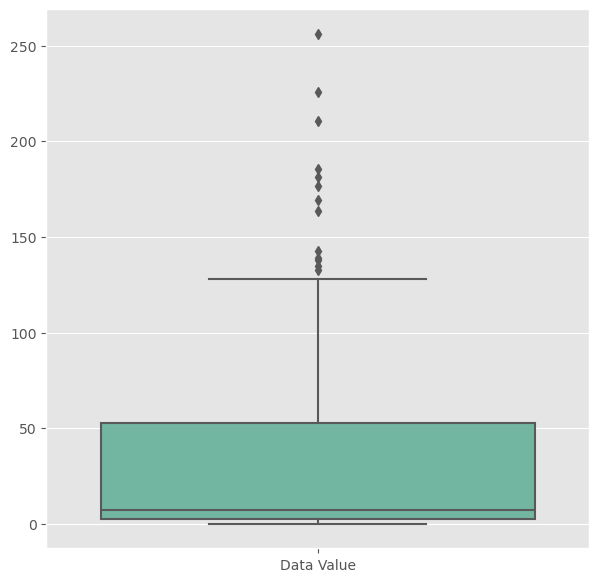

In [28]:
""" Boxplot to visualize potential outliers in air quality's "Data Value"' 
and using the IQR method to identify outliers"""

# Finding outliers using the IQR method

plt.figure(figsize= (7, 7))
ax1 = sns.boxplot(data = filter_Air, palette = 'Set2')

quart1 = filter_Air["Data Value"].quantile(0.25)
quart3 = filter_Air["Data Value"].quantile(0.75)
IQR = quart3 - quart1
    

In [29]:
# Removing outliers using the IQR method

up_lim = quart3 + 1.5 * IQR
low_lim = quart1 - 1.5 * IQR
print('Upper Limit is {0} and Lower Limit is {1}'.format(up_lim,low_lim))
new_air = filter_Air[(filter_Air["Data Value"] > low_lim) | (filter_Air["Data Value"] < up_lim)][['nta_name', 'Time Period','Data Value' ]] 
new_air

Upper Limit is 128.25 and Lower Limit is -72.94999999999999


,nta_name,Time Period,Data Value
0,Southeast Queens,2015,0.3
1,Bensonhurst - Bay Ridge,2015,1.2
357,Chelsea - Clinton,2015,36.4
358,Downtown - Heights - Slope,2015,1.2
745,Canarsie - Flatlands,2005,35.7
...,...,...,...
18014,Brooklyn,2005,52.8
18015,Flatlands and Canarsie (CD18),2005,39.8
18016,Tottenville and Great Kills (CD3),2005,13.0
18017,Jackson Heights (CD3),2005,64.2


## Feature Engineering

<h3> One Hot Encoding </h3>

## Hot Encoding 2005

In [30]:
""" I decided upon one hot encoding instead of integer encoding because it would reduce the 
amount of bias which could lead to inaccurate predictions when the correlation method is done"""

import category_encoders as ce

def hot_encode05(df, col):
    hot_05 = pd.get_dummies(df[[col]], dtype=int)
    #encoder = ce.BinaryEncoder(cols=[col], drop_invariant=True)
    #hot_05 = encoder.fit_transform(df[[col]])
    encode_05 = pd.concat([df, hot_05], axis = 1)
    encode_05 = encode_05.drop([col],axis=1)
   
    return(encode_05)
    
encoded_05 = hot_encode05(tree_Data05, 'status')

dropping = encoded_05.dropna(inplace=True)
encoded_05




,nta_name,address,status_Dead,status_Excellent,status_Good,status_Poor
0,Borough Park,1139 57 STREET,0,0,1,0
1,Georgetown-Marine Park-Bergen Beach-Mill Basin,2220 BERGEN AVENUE,0,0,1,0
2,Georgetown-Marine Park-Bergen Beach-Mill Basin,2360 BERGEN AVENUE,0,0,1,0
3,Georgetown-Marine Park-Bergen Beach-Mill Basin,2254 BERGEN AVENUE,0,0,1,0
4,Georgetown-Marine Park-Bergen Beach-Mill Basin,2332 BERGEN AVENUE,0,0,1,0
...,...,...,...,...,...,...
592367,Todt Hill-Emerson Hill-Heartland Village-Light...,62 LEWISTON STREET,0,0,1,0
592368,Todt Hill-Emerson Hill-Heartland Village-Light...,68 LEWISTON STREET,0,0,1,0
592369,Todt Hill-Emerson Hill-Heartland Village-Light...,69 TRAVIS AVENUE,0,0,1,0
592370,Todt Hill-Emerson Hill-Heartland Village-Light...,69 TRAVIS AVENUE,0,0,1,0


## Merging Tree_05 with Air data

In [31]:
""" merging using cross join tree05 and new_Air"""

encoded_05['key'] = 1
new_air['key'] = 1

min_rows = min(len(encoded_05), len(new_air))

encoded_05 = encoded_05.head(min_rows)
new_air = new_air.head(min_rows)

merging2 = encoded_05.merge(new_air, on='nta_name', how='outer')

del merging2['key_x']
del merging2['key_y']


merge_filter05 = merging2.dropna(subset = ['nta_name',	'address',	'status_Dead',	'status_Excellent',	'status_Good',	'status_Poor',	'Time Period', 'Data Value'])
merge_filter05 



,nta_name,address,status_Dead,status_Excellent,status_Good,status_Poor,Time Period,Data Value
0,Borough Park,1139 57 STREET,0.0,0.0,1.0,0.0,2005,57.8
1,Borough Park,1139 57 STREET,0.0,0.0,1.0,0.0,2015,1.1
2,Borough Park,1139 57 STREET,0.0,0.0,1.0,0.0,2015,0.2
3,Borough Park,1139 57 STREET,0.0,0.0,1.0,0.0,2015,34.4
4,Borough Park,1139 57 STREET,0.0,0.0,1.0,0.0,2005,2.9
...,...,...,...,...,...,...,...,...
804,Upper West Side,609 COLUMBUS AVENUE,0.0,0.0,1.0,0.0,2005,3.9
805,Upper West Side,609 COLUMBUS AVENUE,0.0,0.0,1.0,0.0,2015,50.9
806,Upper West Side,609 COLUMBUS AVENUE,0.0,0.0,1.0,0.0,2005,4.0
807,Upper West Side,609 COLUMBUS AVENUE,0.0,0.0,1.0,0.0,2005,5.4


## Hot Encoding 2015

In [32]:
import category_encoders as ce

def hot_encode15(df1, col1):
    hot_15 = pd.get_dummies(df1[[col1]], dtype=int)
    encode_15 = pd.concat([df1, hot_15], axis = 1)
    encode_15 = encode_15.drop([col1],axis=1)

    return(encode_15)
    
encoded15 = hot_encode15(new_15, 'health')

dropping = encoded15.dropna(inplace=True)
encoded15




,nta_name,address,health_Fair,health_Good,health_Poor
0,Forest Hills,108-005 70 AVENUE,1,0,0
1,Whitestone,147-074 7 AVENUE,1,0,0
2,East Williamsburg,390 MORGAN AVENUE,0,1,0
3,East Williamsburg,1027 GRAND STREET,0,1,0
4,Park Slope-Gowanus,603 6 STREET,0,1,0
...,...,...,...,...,...
683783,North Side-South Side,32 MARCY AVENUE,0,1,0
683784,Forest Hills,67-035 SELFRIDGE STREET,0,1,0
683785,Westerleigh,130 BIDWELL AVENUE,0,1,0
683786,Mount Hope,1985 ANTHONY AVENUE,0,1,0


## Merging Tree_15 with Air data

In [33]:
""" merging using cross join tree05 and new_Air"""


encoded15['key'] = 1
new_air['key'] = 1

min_rows1 = min(len(encoded15), len(new_air))

encoded15 = encoded15.head(min_rows1)
new_air = new_air.head(min_rows1)

merging1 = encoded15.merge(new_air, on='nta_name', how='outer')

del merging1['key_x']
del merging1['key_y']


merge_filter15 = merging1.dropna(subset = ['nta_name',	'address',	'health_Fair',	'health_Good',	'health_Poor',	'Time Period', 'Data Value'])
merge_filter15



,nta_name,address,health_Fair,health_Good,health_Poor,Time Period,Data Value
187,Upper West Side,2163 BROADWAY,1.0,0.0,0.0,2015,210.5
188,Upper West Side,2163 BROADWAY,1.0,0.0,0.0,2005,103.2
189,Upper West Side,2163 BROADWAY,1.0,0.0,0.0,2015,7.0
190,Upper West Side,2163 BROADWAY,1.0,0.0,0.0,2005,3.9
191,Upper West Side,2163 BROADWAY,1.0,0.0,0.0,2015,50.9
...,...,...,...,...,...,...,...
761,East New York,73 NEW JERSEY AVENUE,0.0,1.0,0.0,2005,2.8
762,East New York,73 NEW JERSEY AVENUE,0.0,1.0,0.0,2005,2.3
763,East New York,73 NEW JERSEY AVENUE,0.0,1.0,0.0,2015,0.1
764,East New York,73 NEW JERSEY AVENUE,0.0,1.0,0.0,2005,6.4


<b> Result: </b> how the____

<h2> Hypothesis Testing </h2>

<h3> Normal Distribution </h3>

In [36]:
from scipy import stats

""" Kolmogorov-Smirnov test"""
numeric_columns15 = merge_filter15.select_dtypes(include=[np.number]).columns


ks15 = {}


for column in numeric_columns15:
    ks_statistic, p_value = stats.kstest(merge_filter15[column], 'norm', args=(merge_filter15[column].mean(), merge_filter15[column].std()))
    ks15[column] = {'KS-statistic': ks_statistic, 'p-value': p_value}


results_ks15 = pd.DataFrame(ks15).T


print("K-S Test Results for 2015 Data:")
results_ks15



K-S Test Results for 2015 Data:


C:\Users\careb\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


,KS-statistic,p-value
health_Fair,0.509967,2.879736e-62
health_Good,0.509967,2.879736e-62
health_Poor,NaN,NaN
Data Value,0.281329,2.048528e-18


In [37]:

numeric_columns05 = merge_filter05.select_dtypes(include=[np.number]).columns


ks05 = {}

for column in numeric_columns05:
    ks_statistic, p_value = stats.kstest(merge_filter05[column], 'norm', args=(merge_filter05[column].mean(), merge_filter05[column].std()))
    ks05[column] = {'KS-statistic': ks_statistic, 'p-value': p_value}


results_ks05 = pd.DataFrame(ks05).T


print("\nK-S Test Results for 2005 Data:")
results_ks05


K-S Test Results for 2005 Data:


C:\Users\careb\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


,KS-statistic,p-value
status_Dead,NaN,NaN
status_Excellent,0.495841,4.882221e-144
status_Good,0.428876,4.422084e-106
status_Poor,0.516874,1.988317e-157
Data Value,0.280786,1.452775e-44


In [55]:
""" Finding the pearson correlation between both datasets to determine if the dataset if normally distributed"""

int_columns1 = merge_filter15.select_dtypes(include=[np.number]).columns
cor =  merge_filter15[int_columns1].corr(method='pearson')
cor



,health_Fair,health_Good,health_Poor,Data Value
health_Fair,1.000000,-1.000000,NaN,0.052813
health_Good,-1.000000,1.000000,NaN,-0.052813
health_Poor,NaN,NaN,NaN,NaN
Data Value,0.052813,-0.052813,NaN,1.000000


<h3> Heat Map </h3>

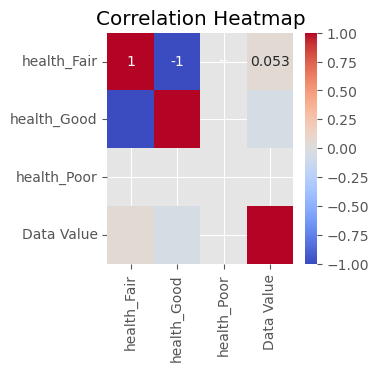

In [60]:
plt.figure(figsize=(3, 3))
sns.heatmap(cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [54]:
int_columns2 = merge_filter05.select_dtypes(include=[np.number]).columns
cor2 =  merge_filter05[int_columns2].corr(method='pearson')
cor2



,status_Dead,status_Excellent,status_Good,status_Poor,Data Value
status_Dead,NaN,NaN,NaN,NaN,NaN
status_Excellent,NaN,1.000000,-0.691205,-0.194714,0.025961
status_Good,NaN,-0.691205,1.000000,-0.574240,-0.021256
status_Poor,NaN,-0.194714,-0.574240,1.000000,-0.000560
Data Value,NaN,0.025961,-0.021256,-0.000560,1.000000


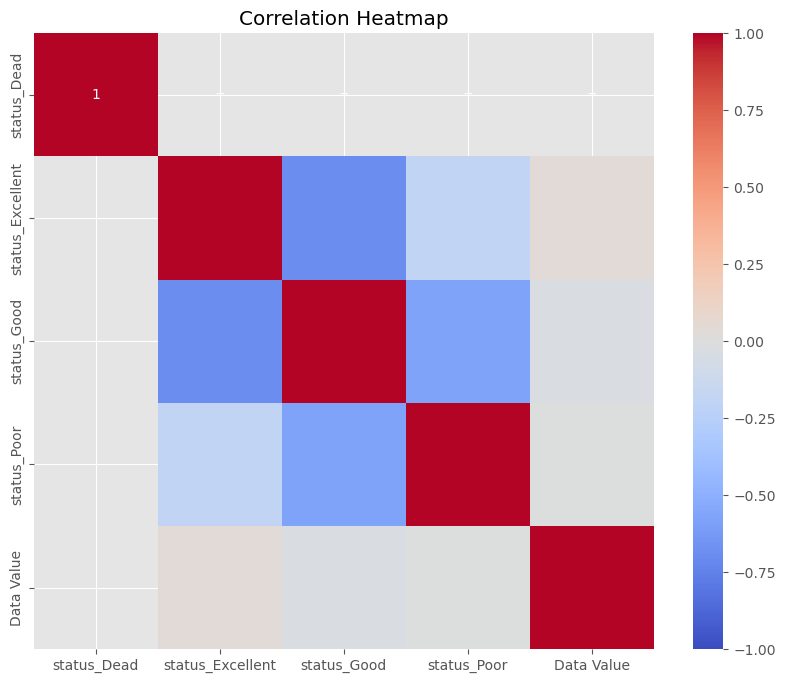

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

<b> Result </b> The null hypothesis is reject due to each p-value being less than 0.05

<h3> One Way Anova 2015 </h3>

In [42]:

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

numeric_columns = merge_filter15.select_dtypes(include=[np.number]).columns
numeric_columns = [col for col in numeric_columns if col != 'Time Period']

results = {}

for column in numeric_columns:
    groups = [group[column].values for name, group in merge_filter15.groupby('Time Period')]
    f_statistic, p_value = stats.f_oneway(*groups)
    results[column] = {'F-statistic': f_statistic, 'p-value': p_value}

results_1 = pd.DataFrame(results).T
results_1



C:\Users\careb\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


,F-statistic,p-value
health_Fair,0.000000,1.000000
health_Good,0.000000,1.000000
health_Poor,NaN,NaN
Data Value,8.264895,0.004384


<b> Result </b> The null hypothesis is reject due to the p-value of 0.004384 being less than 0.05

<h3> One Way Anova 2005 </h3>

In [43]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

numeric_columns2 = merge_filter05.select_dtypes(include=[np.number]).columns
numeric_columns2 = [col for col in numeric_columns2 if col != 'Time Period']

results2 = {}

for column2 in numeric_columns2:
    groups2 = [group2[column2].values for name, group2 in merge_filter05.groupby('Time Period')]
    f_statistic2, p_value2 = stats.f_oneway(*groups2)
    results2[column2] = {'F-statistic': f_statistic2, 'p-value': p_value2}

results_2 = pd.DataFrame(results2).T
results_2

C:\Users\careb\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


,F-statistic,p-value
status_Dead,NaN,NaN
status_Excellent,-2.756160e-30,NaN
status_Good,4.712557e-30,1.000000e+00
status_Poor,-2.879131e-31,NaN
Data Value,6.193883e+01,1.550129e-14


<b> Result </b> The null hypothesis is reject due to the p-value of 0.004384 being less than 0.05

<h2> Model Validation </h2>

<b> Ensuring data accuracy </b> This is my last step of analysis the data because I want to know wheter the models fit the data properly

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, recall_score, f1_score
import itertools

merged_data = pd.concat([merge_filter15, merge_filter05], ignore_index=True)
merged_data

,nta_name,address,health_Fair,health_Good,health_Poor,Time Period,Data Value,status_Dead,status_Excellent,status_Good,status_Poor
0,Upper West Side,2163 BROADWAY,1.0,0.0,0.0,2015,210.5,NaN,NaN,NaN,NaN
1,Upper West Side,2163 BROADWAY,1.0,0.0,0.0,2005,103.2,NaN,NaN,NaN,NaN
2,Upper West Side,2163 BROADWAY,1.0,0.0,0.0,2015,7.0,NaN,NaN,NaN,NaN
3,Upper West Side,2163 BROADWAY,1.0,0.0,0.0,2005,3.9,NaN,NaN,NaN,NaN
4,Upper West Side,2163 BROADWAY,1.0,0.0,0.0,2015,50.9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
883,Upper West Side,609 COLUMBUS AVENUE,NaN,NaN,NaN,2005,3.9,0.0,0.0,1.0,0.0
884,Upper West Side,609 COLUMBUS AVENUE,NaN,NaN,NaN,2015,50.9,0.0,0.0,1.0,0.0
885,Upper West Side,609 COLUMBUS AVENUE,NaN,NaN,NaN,2005,4.0,0.0,0.0,1.0,0.0
886,Upper West Side,609 COLUMBUS AVENUE,NaN,NaN,NaN,2005,5.4,0.0,0.0,1.0,0.0


In [45]:
"""___"""

# Removing numeric values from model to prevent type errors
numeric_data = merge_filter05.select_dtypes(include=[np.number]).columns
int_data = merged_data[numeric_data].dropna()


merged_data.columns = merged_data.columns.str.strip()


if 'Data Value' not in int_data.columns:
    raise ValueError("'Data Value' column not found in the DataFrame")

X = int_data.drop(columns=['Data Value'])
y = int_data['Data Value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

model = LinearRegression()


model.fit(X, y)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-validation RMSE: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")

# Measures the average prediction error and R-squared shows the varience between air qu
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error {}".format(mse))
print("R-squared {}".format(r2))

Cross-validation RMSE: 67.4424 (+/- 6.9748)
Mean Squared Error 4387.1789763779525
R-squared -0.02084034719640937


<b> Result </b> Because the mean square error
is much higher than the r-squared values, the null hypothesis is not rejected

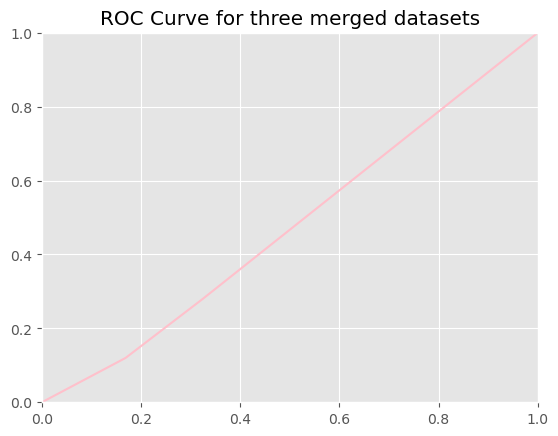

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

y_binary = (y > y.median()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=0)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='pink')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for three merged datasets')
plt.grid(True)


<b> Result </b> Because the is a small curve from 0.0 to around 0.2 there is poor accuracy 

<h1> Conculsion </h1> 

<b> Result </b> Overall based on the tests and distributions of data values I would say the null hypothesis can not be rejected